### **The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.**

# ***Hypothesis Generation***
*The sales of the item in an outlet can be affected by the product type  whetehr it is one of the life essentials products or not, it can be affected by the type of people using the store whether they are farmers or civilians ..etc it is according to the region they live in
people tend to buy more of the essential things and less of things like snacks and all. also not all people think the same about the items some may think that something is essential and others think that it is not and that is according to their mentality*

### **Data set analysis:**
 - Item_Weight: a real number representing the weight of the item => has null values taht need  to be handled, and normalized
 - Item_fat: categorical column (Low Fat (low fat, LF), Regular (reg) ...) => needs to standardize values and apply one hot encoding
 - Item_Visibility: percentage of the shelf space allocated for the item (contains null values)
 - Item_type: a categorical attribute representing category of an item
 - Item_MRP: continuous values maximum retail price
 - Outlet_Identifier: the id of the outlet that sells the item
 - Outlet_establishment_Year: the year that the store was established in
 - Outlet_Size: categorical attribute representing the outlet size
 - Outlet_Location_Type: categorical attribute to represent the location of the outlet
 - Outlet_Type: categorical attribute to represent the type of the outlet
 - Item_Outlet_Sales: continuous attribute (the target attribute), represent the sales of the item in a particualr store



# ***Loading Packages and Data***

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
import category_encoders as ce


In [88]:
train_set_file = 'Train.csv'
test_set_file = 'Test.csv'

data_train = pd.read_csv(train_set_file)
data_test = pd.read_csv(test_set_file)

In [89]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# ***Data Structure and Content***

In [91]:
data_train.shape

(8523, 12)

In [92]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [93]:
item_fat_categories = data_train['Item_Fat_Content'].unique()
item_types = data_train['Item_Type'].unique()
outlet_years = data_train['Outlet_Establishment_Year'].unique()
outlet_sizes = data_train['Outlet_Size'].unique()
locations = data_train['Outlet_Location_Type'].unique()
outlet_types = data_train['Outlet_Type'].unique()

target = data_train['Item_Outlet_Sales']
data_train.drop(['Item_Outlet_Sales'], axis = 1, inplace=True)

In [94]:
print(f'the item fat content categories: \n{item_fat_categories}\n\n')
print(f'the item types: \n{item_types}\n\n')
print(f'the outlet creation years: \n{outlet_years}\n\n')
print(f'the outlet sizes: \n{outlet_sizes}\n\n')
print(f'the outlets locations: \n{locations}\n\n')
print(f'the outlets types: \n{outlet_types}')


the item fat content categories: 
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


the item types: 
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


the outlet creation years: 
[1999 2009 1998 1987 1985 2002 2007 1997 2004]


the outlet sizes: 
['Medium' nan 'High' 'Small']


the outlets locations: 
['Tier 1' 'Tier 3' 'Tier 2']


the outlets types: 
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [95]:
# data_train.head()
print(target)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


### **Data Visualization:**
For numerical attributes

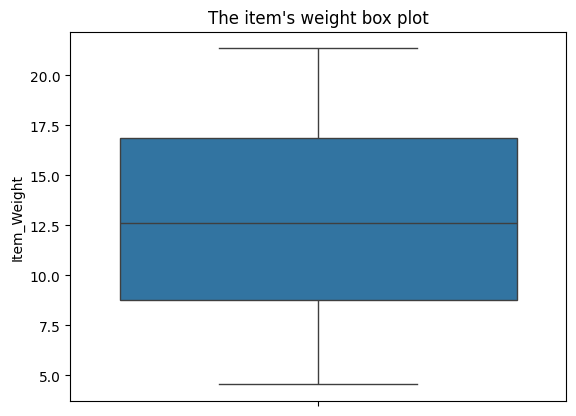

In [96]:
sns.boxplot(data_train['Item_Weight'])
plt.title("The item's weight box plot")
plt.show()


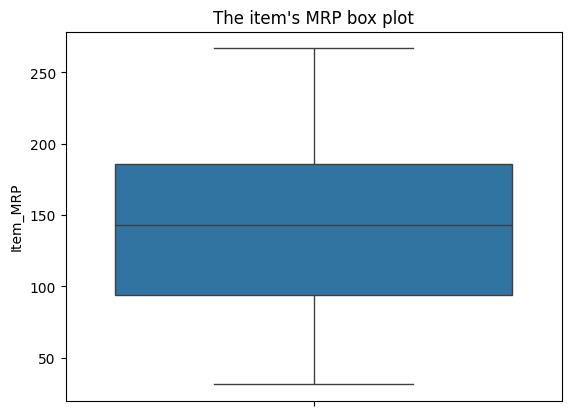

In [97]:
sns.boxplot(data_train['Item_MRP'])
plt.title("The item's MRP box plot")
plt.show()


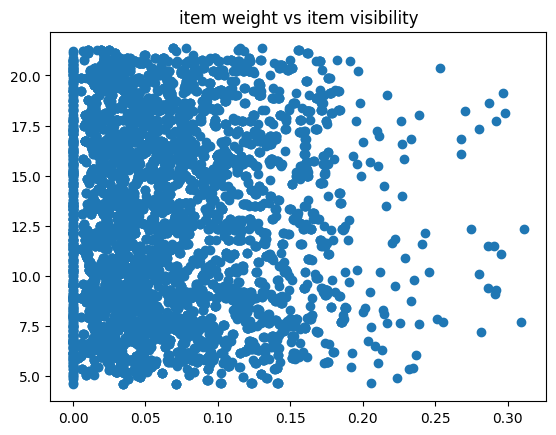

In [98]:
plt.scatter(data_train['Item_Visibility'], data_train['Item_Weight'])
plt.title("item weight vs item visibility")
plt.show()
# no usefull information

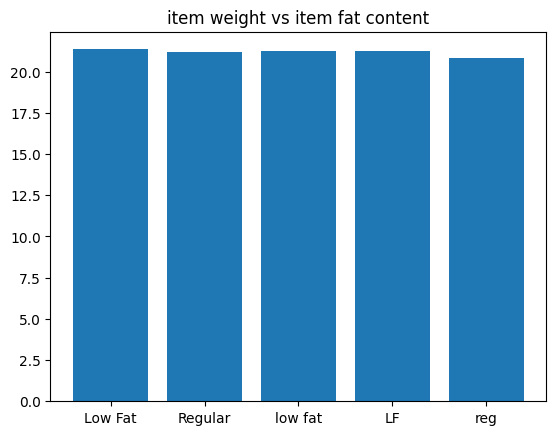

In [99]:
plt.bar(data_train['Item_Fat_Content'], data_train['Item_Weight'])
plt.title("item weight vs item fat content")
plt.show()
#no usefull information

In [100]:
num_of_outlets_in_region = data_train['Outlet_Location_Type'].value_counts()
num_of_outlets_in_region
# Tier 1: urban
# Tier 2: semi-urban
# Tier 3: rural areas

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [101]:
num_of_outlets_in_type = data_train['Outlet_Type'].value_counts()
num_of_outlets_in_type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [102]:
num_of_outlets_each_type_in_region = data_train['Outlet_Type'].groupby(by = data_train['Outlet_Location_Type']).value_counts()
num_of_outlets_each_type_in_region

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860
                      Grocery Store         528
Tier 2                Supermarket Type1    2785
Tier 3                Supermarket Type3     935
                      Supermarket Type1     932
                      Supermarket Type2     928
                      Grocery Store         555
Name: Outlet_Type, dtype: int64

In [103]:
num_of_outlets_each_size_in_region = data_train['Outlet_Size'].groupby(by = data_train['Outlet_Location_Type']).value_counts()
num_of_outlets_each_size_in_region

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [104]:
# removing duplicates from dataset
print(f'data shape with duplicates: {data_train.shape}')
data_train = data_train.drop_duplicates()
print(f'data shape without duplicates: {data_train.shape}')
# the data set does not contain any duplicates

data shape with duplicates: (8523, 11)
data shape without duplicates: (8523, 11)


### Checking the missing values

In [105]:
weight_null_count = data_train['Item_Weight'].isnull().sum()

print(f'the number of missing values in visibility: {weight_null_count}')

the number of missing values in visibility: 1463


In [106]:
# handling missing values in item weight
mean_weight = np.mean(data_train['Item_Weight'])
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(mean_weight)

mean_weighttst = np.mean(data_test['Item_Weight'])
data_test['Item_Weight'] = data_test['Item_Weight'].fillna(mean_weighttst)

data_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [107]:
visibility_null_count = data_train[data_train['Item_Visibility']== 0]

print(f'the number of missing values in visibility: {visibility_null_count.shape[0]}')

the number of missing values in visibility: 526


In [108]:
# handling missing values in item visibility
mean_visibility = np.mean(data_train['Item_Visibility'])
data_train['Item_Visibility'].replace( 0 , mean_visibility, inplace = True)
data_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [109]:
outlet_size_null_count = data_train['Outlet_Size'].isnull().sum()

print(f'the number of missing values in outlet size: {outlet_size_null_count}')

the number of missing values in outlet size: 2410


In [110]:
outlet_size_count = data_train['Outlet_Size'].value_counts()
outlet_size_count

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [111]:
# since the most frequent outlets size is medium we replace the null values with medium
data_train['Outlet_Size'] = data_train['Outlet_Size'].fillna('Medium')
data_test['Outlet_Size'] = data_test['Outlet_Size'].fillna('Medium')
data_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1


### **Cleaning the data**

In [112]:
data_train['Item_Fat_Content'].replace({'LF': 'low fat', 'Low Fat' : 'low fat', 'reg': 'regular', 'Regular': 'regular'}, inplace=True)
data_train['Item_Fat_Content'].unique()


array(['low fat', 'regular'], dtype=object)

In [113]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 799.0+ KB


In [114]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867
std,4.226124,0.048742,62.275067,8.371760
min,4.555000,0.003575,31.290000,1985.000000
25%,9.310000,0.033085,93.826500,1987.000000
50%,12.857645,0.062517,143.012800,1999.000000
75%,16.000000,0.094585,185.643700,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [115]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [116]:
# scaling the data ['Item_Weight', 'Item_MRP']
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Item_Weight', 'Item_MRP']
scaler = StandardScaler()
data_train[columns_to_scale] = scaler.fit_transform(data_train[columns_to_scale])
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,-0.841872,low fat,0.016047,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,-1.641706,regular,0.019278,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,1.098554,low fat,0.016760,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,1.500838,regular,0.066132,Fruits and Vegetables,0.660050,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,-0.929428,low fat,0.066132,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1


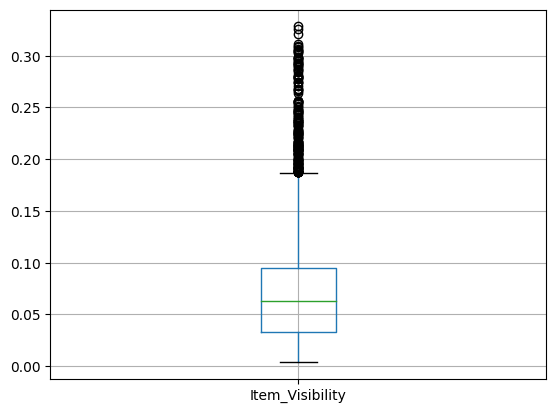

In [117]:
data_train.boxplot(column = ['Item_Visibility'])
plt.show()

### Checking the correlation of each feature with the target:

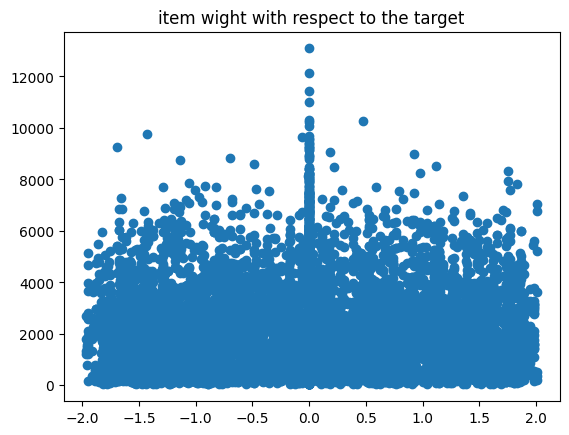

In [118]:
plt.scatter(data_train['Item_Weight'], target)
plt.title('item wight with respect to the target')
plt.show()

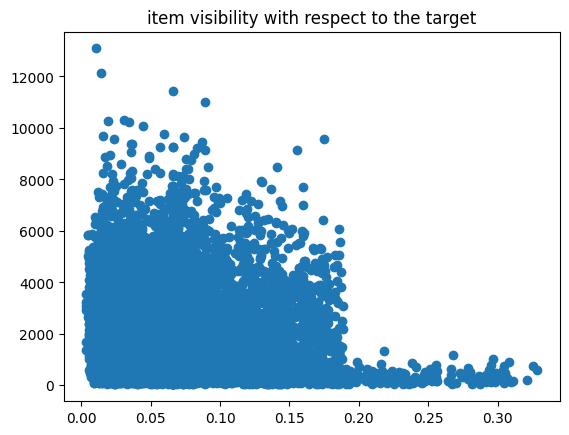

In [119]:
plt.scatter(data_train['Item_Visibility'], target)
plt.title('item visibility with respect to the target')
plt.show()

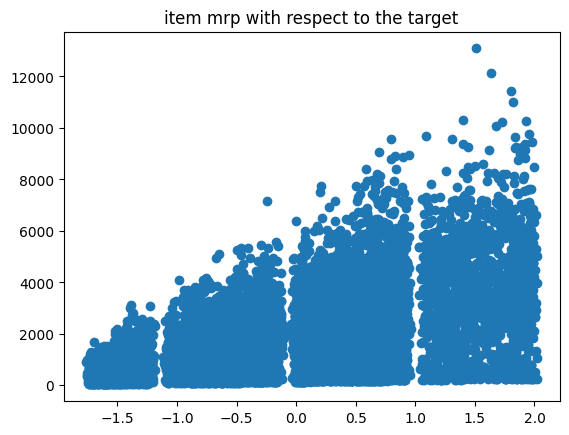

In [120]:
plt.scatter(data_train['Item_MRP'], target)
plt.title('item mrp with respect to the target')
plt.show()

In [121]:
# encoding data:
#['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
encoder = ce.OneHotEncoder(cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], handle_unknown='return_nan', return_df= True, use_cat_names= True)
data_train_encoded = encoder.fit_transform(data_train)


data_train_encoded.drop(['Item_Identifier'], axis = 1, inplace = True)
data_train_encoded


,Item_Weight,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,...,Outlet_Size_Medium,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,-0.841872,1.0,0.0,0.016047,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.641706,0.0,1.0,0.019278,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.098554,1.0,0.0,0.016760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.500838,0.0,1.0,0.066132,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.929428,1.0,0.0,0.066132,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,1.0,0.0,0.056783,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8519,-1.059578,0.0,1.0,0.046982,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8520,-0.534243,1.0,0.0,0.035186,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8521,-1.336444,0.0,1.0,0.145221,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [122]:
outlet_id_col = data_train.pop('Outlet_Identifier')
data_train.insert(0, 'Outlet_Identifier', outlet_id_col)
data_train.drop('Item_Identifier', axis = 1, inplace=True)
data_train

,Outlet_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,-0.841872,low fat,0.016047,Dairy,1.747454,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,-1.641706,regular,0.019278,Soft Drinks,-1.489023,2009,Medium,Tier 3,Supermarket Type2
2,OUT049,1.098554,low fat,0.016760,Meat,0.010040,1999,Medium,Tier 1,Supermarket Type1
3,OUT010,1.500838,regular,0.066132,Fruits and Vegetables,0.660050,1998,Medium,Tier 3,Grocery Store
4,OUT013,-0.929428,low fat,0.066132,Household,-1.399220,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
8518,OUT013,-1.418084,low fat,0.056783,Snack Foods,1.180783,1987,High,Tier 3,Supermarket Type1
8519,OUT045,-1.059578,regular,0.046982,Baking Goods,-0.527301,2002,Medium,Tier 2,Supermarket Type1
8520,OUT035,-0.534243,low fat,0.035186,Health and Hygiene,-0.897208,2004,Small,Tier 2,Supermarket Type1
8521,OUT018,-1.336444,regular,0.145221,Snack Foods,-0.607977,2009,Medium,Tier 3,Supermarket Type2


In [123]:
outlet_groups = data_train.groupby('Outlet_Identifier')
outlet_dfs = []

for outlet_id, outlet_data in outlet_groups:
  outlet_dfs.append(outlet_data)

outlet_dfs[1].head(20)

,Outlet_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,OUT013,-0.929428,low fat,0.066132,Household,-1.399220,1987,High,Tier 3,Supermarket Type1
6,OUT013,0.187501,regular,0.012741,Snack Foods,-1.338238,1987,High,Tier 3,Supermarket Type1
14,OUT013,0.826422,low fat,0.068024,Fruits and Vegetables,0.890454,1987,High,Tier 3,Supermarket Type1
20,OUT013,1.418015,regular,0.138190,Snack Foods,1.764527,1987,High,Tier 3,Supermarket Type1
27,OUT013,-0.285774,low fat,0.019356,Hard Drinks,-1.636006,1987,High,Tier 3,Supermarket Type1
41,OUT013,-0.723553,low fat,0.026818,Meat,-0.240733,1987,High,Tier 3,Supermarket Type1
44,OUT013,-0.167455,regular,0.042278,Canned,-0.232662,1987,High,Tier 3,Supermarket Type1
51,OUT013,-0.630081,low fat,0.159804,Frozen Foods,0.008393,1987,High,Tier 3,Supermarket Type1
52,OUT013,-0.701072,regular,0.028697,Canned,-0.384504,1987,High,Tier 3,Supermarket Type1
71,OUT013,0.708103,regular,0.121532,Baking Goods,-1.313135,1987,High,Tier 3,Supermarket Type1


In [124]:
for outlet_id, outlet_df in zip(data_train['Outlet_Identifier'].unique(), outlet_dfs):
  length = len(outlet_df)
  print(f"Outlet {outlet_id}: Length = {length}\n type: {outlet_df['Outlet_Type'].unique()}\n location: {outlet_df['Outlet_Location_Type'].unique()}\n size: {outlet_df['Outlet_Size'].unique()}\n year: {outlet_df['Outlet_Establishment_Year'].unique()}\n\n")
  outlet_df.drop(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Identifier', 'Outlet_Establishment_Year' ], axis=1, inplace=True)

Outlet OUT049: Length = 555
 type: ['Grocery Store']
 location: ['Tier 3']
 size: ['Medium']
 year: [1998]


Outlet OUT018: Length = 932
 type: ['Supermarket Type1']
 location: ['Tier 3']
 size: ['High']
 year: [1987]


Outlet OUT010: Length = 926
 type: ['Supermarket Type1']
 location: ['Tier 2']
 size: ['Medium']
 year: [2007]


Outlet OUT013: Length = 928
 type: ['Supermarket Type2']
 location: ['Tier 3']
 size: ['Medium']
 year: [2009]


Outlet OUT027: Length = 528
 type: ['Grocery Store']
 location: ['Tier 1']
 size: ['Small']
 year: [1985]


Outlet OUT045: Length = 935
 type: ['Supermarket Type3']
 location: ['Tier 3']
 size: ['Medium']
 year: [1985]


Outlet OUT017: Length = 930
 type: ['Supermarket Type1']
 location: ['Tier 2']
 size: ['Small']
 year: [2004]


Outlet OUT046: Length = 929
 type: ['Supermarket Type1']
 location: ['Tier 2']
 size: ['Medium']
 year: [2002]


Outlet OUT035: Length = 930
 type: ['Supermarket Type1']
 location: ['Tier 1']
 size: ['Small']
 year: [1997

In [125]:
# Groceries (500+ item in store)
# Supermarkets (900+item in store)

# Tier 1: supermarket1 => 2 (m, s)
#         grocery store => 1 s

# Tier 2: supermarket1 => 3 (m, s, m)

# Tier 3: supermarket1 => 1 (h)
#         grocery store => 1 m
#         supermarket3 => 1 (m)
#         supermarket2 => 1 m

outlet_dfs[1].head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
4,-0.929428,low fat,0.066132,Household,-1.399220
6,0.187501,regular,0.012741,Snack Foods,-1.338238
14,0.826422,low fat,0.068024,Fruits and Vegetables,0.890454
20,1.418015,regular,0.138190,Snack Foods,1.764527
27,-0.285774,low fat,0.019356,Hard Drinks,-1.636006


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [127]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_train_encoded['Outlet_Identifier'] = label_encoder.fit_transform(data_train_encoded['Outlet_Identifier'])
